In [1]:
import ROOT
import uproot
import matplotlib.pyplot as plt
import numpy as np
import awkward as ak

from sklearn.preprocessing import normalize as norm

Welcome to JupyROOT 6.30/04


In [2]:
FILE_PATH = "../Dati/Run_Na_Couples_CDF20_Data_5_9_2024_Ascii.root" #Relative file path
file1 = uproot.open(FILE_PATH)


In [3]:
nch=file1["tree"]["ch"].array()
print(nch)

[[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], ..., [4, 5, 6, 7, ..., 13, 14, 15]]


In [4]:

baselines = file1["tree"]["base"].array()
charges = file1["tree"]["charge"].array()
amp = file1["tree"]["amp"].array()
lead_edge = file1["tree"]["letime"].array()
t_edge = file1["tree"]["tetime"].array()
channel= file1["tree"]["ch"].array()
waveform = file1["tree"]["pshape"].array()

In [5]:
N_ev=len(charges[:, 0])
print(N_ev)



100000


110
3628


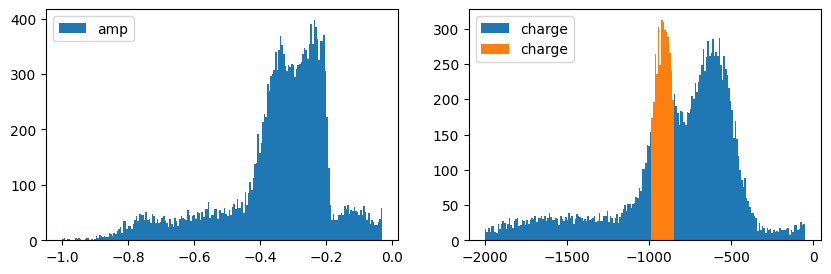

In [43]:
channel=15
bins = 200

right = [6,10,7,7,8,6,4,4,4,7,6,8]
left = [6,10,5,6,5,3,4,5,5,6,6,6]
#right = np.repeat(20,12)
#left = np.repeat(20,12)
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
a=plt.hist(amp[:, channel-4], bins=bins, range=(-1, -0.03), label='amp')
plt.legend()
plt.subplot(1,2,2)
b=plt.hist(charges[:, channel-4], bins=bins, range=(-2000, -50), label='charge')


print(np.argmax(b[0]))
idx=np.argmax(b[0])
mask=np.where( (charges[:,channel-4]>b[1][idx-left[channel-4]]) &( charges[:, channel-4]<b[1][idx+right[channel-4]]))[0]
print(len(mask))

b1=plt.hist(charges[:, channel-4][mask], bins=bins, range=(-2000, -50), label='charge')
plt.legend()



In [47]:
limL=np.zeros(16)
limR=np.zeros(16)
for channel in range(4,16):
    try:
        b=np.histogram(charges[:, channel-4], bins=bins, range=(-2000, -50))
        idx=np.argmax(b[0])
        limL[channel]=b[1][idx-left[channel-4]]
        limR[channel]=b[1][idx+right[channel-4]]

    except IndexError:
        limL[channel]=b[1][idx]
        limR[channel]=b[1][idx+1]
        continue

canale=[4,5,6,7,8,9,10,11,12,13,14,15]
coppia=np.array([ [4,5], [6,7], [8,9], [10,11],[12,13],[14,15] ])
#coppia=np.array([[4,5]])
firstch = coppia[:,0]
secondch = coppia[:,1]

map = np.repeat(-1,16)

for i in range(16):
    if np.where(coppia.flatten()==i)[0].size>0:
        map[i]=np.where(coppia.flatten()==i)[0]
print("mappa:",map)

firstch_limits=[ [limL[coppia[i][0]], limR[coppia[i][0]]] for i in range(len(coppia))]
secondch_limits=[[limL[coppia[i][1]], limR[coppia[i][1]]] for i in range(len(coppia))]

print("Primo limite:",firstch_limits)
print("Secondo limite:",secondch_limits)

mappa: [-1 -1 -1 -1  0  1  2  3  4  5  6  7  8  9 10 11]
Primo limite: [[-498.5, -381.5], [-576.5, -459.5], [-605.75, -479.0], [-313.25, -235.25], [-498.5, -410.75], [-713.0, -596.0]]
Secondo limite: [[-830.0, -635.0], [-771.5, -644.75], [-332.75, -245.0], [-488.75, -401.0], [-722.75, -596.0], [-986.0, -849.5]]


/tmp/ipykernel_10055/2186760841.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  map[i]=np.where(coppia.flatten()==i)[0]


In [48]:
paired_amp_1 = []
paired_charge_1 = []
paired_letime_1 = []
paired_wf_1 = []


paired_amp_2 = []
paired_charge_2 = []
paired_letime_2 = []
paired_wf_2 = []

whichpair=[]

for event in range(N_ev):
    for channel1, channel2, limF, limS in zip(map[firstch],map[secondch],firstch_limits,secondch_limits):
        #controllo se c'è un evento nel primo della coppia
        if(charges[event][channel1] >= limF[0] and charges[event][channel1] <= limF[1]):
            #se sì, vedo se ce n'è uno anche nel secondo della coppia
            if (charges[event][channel2] >= limS[0] and charges[event][channel2] <= limS[1]):
                #salvo i parametri del primo canale della coppia
                whichpair.append(channel1)

                paired_amp_1.append(amp[event][channel1])
                paired_charge_1.append(charges[event][channel1])
                paired_letime_1.append(lead_edge[event][channel1])
                paired_wf_1.append(waveform[event][channel1])

                paired_amp_2.append(amp[event][channel2])
                paired_charge_2.append(charges[event][channel2])
                paired_letime_2.append(lead_edge[event][channel2])
                paired_wf_2.append(waveform[event][channel2])

#import gc
#del waveform100
#gc.collect()
whichpair = np.array(whichpair)



6023


(array([1368.,    0.,  724.,    0., 1980.,    0.,  909.,    0.,  583.,
         459.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

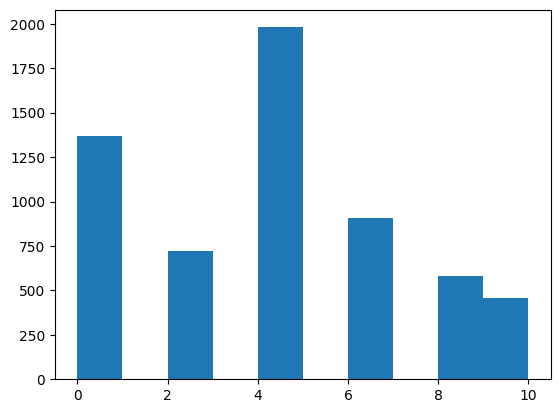

In [49]:
print(len(paired_amp_1))
plt.hist(whichpair)


n = 35, 	 thr = -0.15	
channel: 4 2.6650729802146573 -3.148088848002578
channel: 6 2.6906783256058864 -2.503627679667793
channel: 8 2.838043066187855 -1.5202021987879528
channel: 10 2.4961474768204104 2.1909639371525316
channel: 12 2.6815177601227593 -0.8167790663835977
channel: 14 2.6985758322135394 -2.926835847205005
n = 35, 	 thr = -0.1	
channel: 4 2.580387081260645 -3.131901617446779
channel: 6 2.5729640057918424 -2.5440993432267476
channel: 8 2.723140429906329 -1.3815528984408232
channel: 10 2.425015430569583 2.1990895265131223
channel: 12 2.524187008963 -0.8157818774552972
channel: 14 2.5777202083074684 -2.974886792649954
n = 35, 	 thr = -0.9	
channel: 4 5.8018298592019235 -0.6911049930224399
channel: 6 5.58769768583239 0.1496994964815308
channel: 8 5.588900518870039 -0.36517463458719607
channel: 10 5.954460819352534 -0.625252218545882
channel: 12 5.986674261420256 -0.7121714637052966
channel: 14 5.771495129528388 -0.5878678002615075
n = 35, 	 thr = -0.8	
channel: 4 5.93128803476

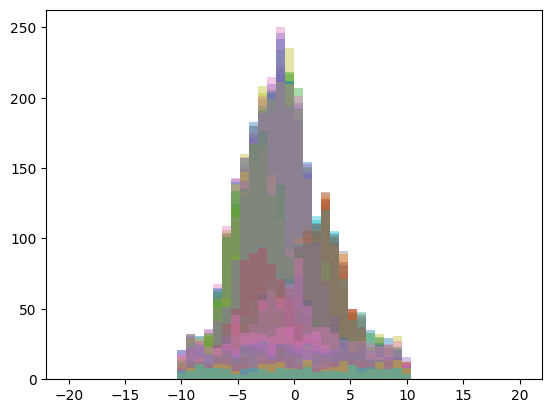

In [101]:
i = 0
j = 0
sampling=0.312
shiftR=8
shiftL=2
mean = [35,38,40,42,45]
tresh = [-0.15,-0.10,-0.9,-0.8]
stds = np.zeros([len(mean), len(tresh),6])

for n in mean:
    for thr in tresh:
        print(f'{n = }, \t {thr = }\t')

        wf_1_len = len(paired_wf_1)
        wf_2_len = len(paired_wf_2)

        new_wf_1 = np.array(paired_wf_1).reshape([np.array(paired_wf_1).shape[0], 1, np.array(paired_wf_1).shape[1]])
        new_wf_2 = np.array(paired_wf_2).reshape([np.array(paired_wf_2).shape[0], 1, np.array(paired_wf_2).shape[1]])

        for evt in range(new_wf_1.shape[0]):
            for ch in range(new_wf_1.shape[1]):
                bsl_1 = new_wf_1[evt, ch, 0:32].mean()
                bsl_2 = new_wf_2[evt, ch, 0:32].mean()
                new_wf_1[evt, ch, :] = np.convolve(new_wf_1[evt, ch], [1/n] * n, mode = "same") - bsl_1
                new_wf_2[evt, ch, :] = np.convolve(new_wf_2[evt, ch], [1/n] * n, mode = "same") - bsl_2


        new_wf_1 = -norm(-new_wf_1.reshape(-1, 1024), norm = "max", axis = 1, copy = True, return_norm = False)
        new_wf_2 = -norm(-new_wf_2.reshape(-1, 1024), norm = "max", axis = 1, copy = True, return_norm = False)

        threshold = thr
                

        ledges1 = np.zeros(new_wf_1.shape[0])
        ledges2 = np.zeros(new_wf_2.shape[0])

        for evt in range(new_wf_1.shape[0]):
            ledge= np.where(np.diff(np.sign(new_wf_1[evt] - threshold)))[0][0]
            #ledges1[evt]=np.interp(threshold,  [new_wf_1[evt][ledge-shift], new_wf_1[evt][ledge+shift]], [ledge-shift, ledge+shift])
            coef = np.polyfit(new_wf_1[evt][ledge-shiftL:ledge+shiftR],np.arange(ledge-shiftL, ledge+shiftR),1)
            ledges1[evt] = np.poly1d(coef)(threshold) 
            ledge = np.where(np.diff(np.sign(new_wf_2[evt] - threshold)))[0][0]
            #ledges2[evt]=np.interp(threshold,  [new_wf_2[evt][ledge-shift], new_wf_2[evt][ledge+shift]], [ledge-shift, ledge+shift])
            coef = np.polyfit(new_wf_2[evt][ledge-shiftL:ledge+shiftR],np.arange(ledge-shiftL, ledge+shiftR),1)
            ledges2[evt] = np.poly1d(coef)(threshold)
        

        timeres=ledges1-ledges2
        std = []
        for select in range(0,12,2):
            mask=np.where((np.abs(timeres*sampling) < 10)&(whichpair==select))[0]
            plt.hist(timeres[mask]*sampling, bins=50, range=(-20,20),alpha=0.4)
            print("channel:",select+4,np.std(sampling*timeres[mask]), np.mean(sampling*timeres[mask]))
            std.append(np.std(sampling*timeres[mask]))
        stds[i][j] = std
        j += 1
    j = 0
    i += 1


#4.1669487180823195evt = 5

Text(0, 0.5, 'std [ns]')

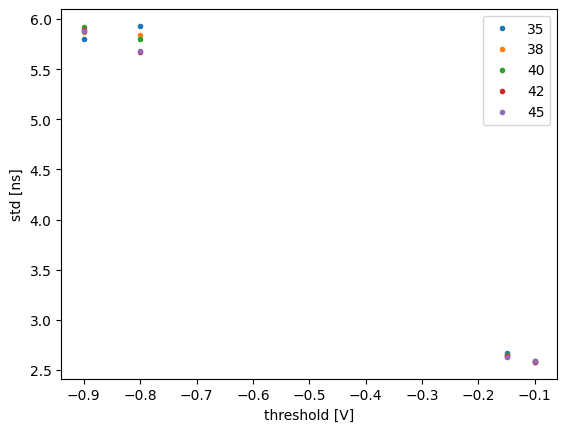

In [104]:
select = 0
for n in range(len(mean)):
    plt.plot(tresh, stds[n,:,select] ,'.',label = f'{mean[n]}')
plt.legend()
plt.xlabel("threshold [V]")
plt.ylabel("std [ns]")

-8.551693146324697


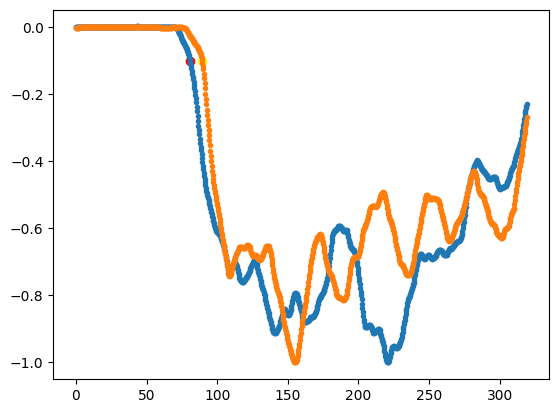

In [70]:
evt = 2
plt.plot(np.arange(0, 1024)*sampling, new_wf_1[evt],'.')
plt.plot(np.arange(0, 1024)*sampling, new_wf_2[evt],'.')
plt.scatter(ledges1[evt]*sampling,threshold,c="red")
plt.scatter(ledges2[evt]*sampling,threshold,c="yellow")
print((ledges1[evt]-ledges2[evt])*sampling)